In [23]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf, precision=4)
import matplotlib.pyplot as plt
import cv2

from skimage.transform import resize, pyramid_reduce
import sys
import time

# import from the eggnog_preprocessing repo
sys.path.append('../../eggnog_preprocessing/preprocessing/')
import read_videos_write_img_paf_hm as prep

from skimage import io

import pprint

In [3]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
#         plt.imshow(images[-1])
        plt.imshow(image, cmap=plt.get_cmap('gray'), alpha=1.0)
#         plt.colorbar()
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     print('np.array(fig.get_size_inches()) * n_images', np.array(fig.get_size_inches()) * n_images)
#     fig.set_size_inches([246, 164])
    plt.show()
    

test_image_file_path /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r8/755_240x320_transformed.jpg
original transformed rgb image =


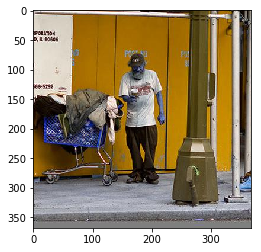

/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r8/755_mask.npy
test mask shape (46, 46)
(test_mask[:][:] == 1).all() True
mask


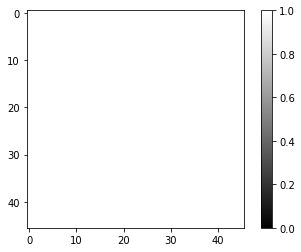

In [19]:
## list directory of output transformed images
transformed_dir = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r8/" 
tx_imgs = [im for im in sorted(os.listdir(transformed_dir)) if im.endswith('.jpg')]

image_idx = 177 # 207


# original image 240x320
test_image_file_path = os.path.join(transformed_dir, tx_imgs[image_idx])
print("test_image_file_path", test_image_file_path)

original_image = cv2.imread(test_image_file_path)  # B,G,R order
rgb_image = original_image[:,:,[2,1,0]]
down_image = pyramid_reduce(rgb_image, downscale=8)

print("original transformed rgb image =")
plt.figure(0)
plt.imshow(rgb_image)  
plt.show()


# show mask
test_mask_path = test_image_file_path.replace("240x320", "mask").replace(".jpg", ".npy").replace("_transformed", "")
print(test_mask_path)

test_mask = np.load(test_mask_path)
print("test mask shape", test_mask.shape)  # (46, 46)
# print("test_mask", test_mask)


print("(test_mask[:][:] == 1).all()",(test_mask[:][:] == 1).all() )
print("mask")
plt.figure(0)
plt.imshow(test_mask, alpha=1, cmap='gray', vmax = 1, vmin = 0)
plt.colorbar()
plt.show()

/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r8/755_heatmap30x40_transformed.npy
test heatmap shape (46, 46, 11)
heatmap test for seq


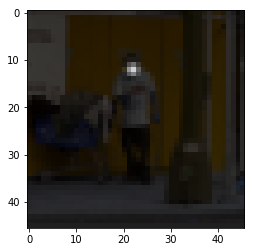

heatmap test for seq


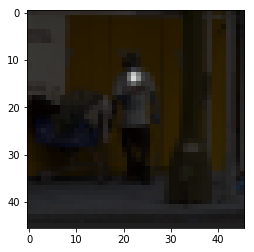

heatmap test for seq


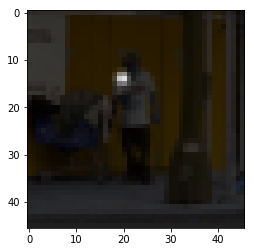

heatmap test for seq


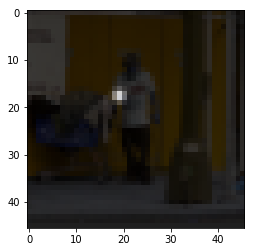

heatmap test for seq


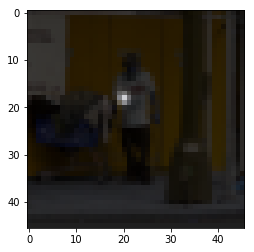

heatmap test for seq


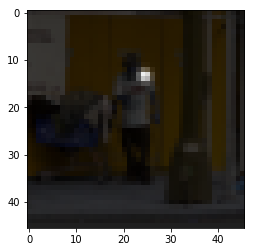

heatmap test for seq


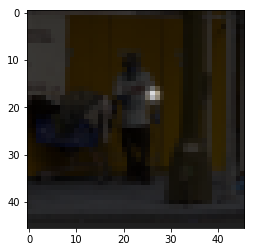

heatmap test for seq


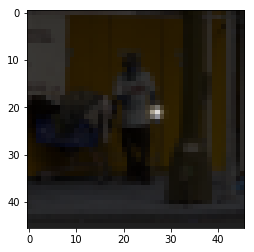

heatmap test for seq


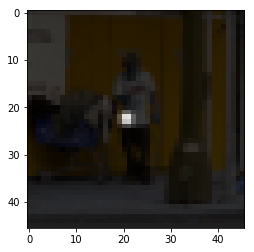

heatmap test for seq


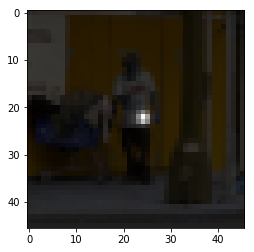

heatmap test for seq


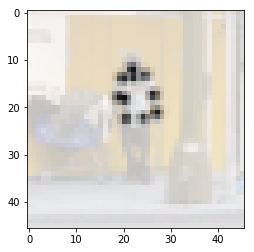

bk_hm shape (46, 46)
RGB image


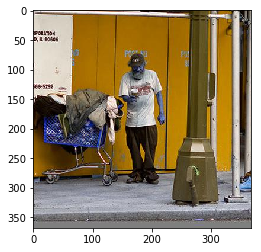

heatmap test


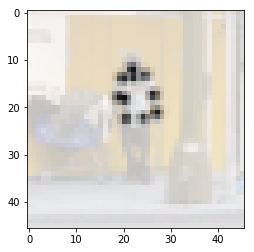

In [20]:
# show heatmaps

test_heatmap_file_path = test_image_file_path.replace("240x320", "heatmap30x40").replace(".jpg", ".npy")
print(test_heatmap_file_path)

gt_heatmap_file_path = test_heatmap_file_path
test_heatmap = np.load(test_heatmap_file_path)
print("test heatmap shape", test_heatmap.shape)  # (46, 46, 11)
gt_heatmap = np.load(gt_heatmap_file_path)

images = []  # a list containing alternated test_hm and gt_hm
titles = []  # titles for images above
len_hm = test_heatmap.shape[2]


# for i in range(test_heatmap.shape[2]):
# #     if i == test_heatmap.shape[2] - 1:
#     #2 faster
#     images.append(gt_heatmap[:,:,i])  #
#     images.append(test_heatmap[:,:,i])  #
#     images.append(rgb_image)

#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     titles.append('rgb image')

#     show_images(images, 1, titles)
#     images = []
#     titles = []


for i in range(test_heatmap.shape[2]):
    print("heatmap test for seq")
    plt.figure()
    plt.imshow(gt_heatmap[:,:,i], cmap=plt.get_cmap('gray'))
    plt.imshow(down_image, alpha=0.25)
    plt.show()


bk_hm = test_heatmap[:,:,len_hm-1]
print("bk_hm shape", bk_hm.shape)

print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

print("heatmap test")
plt.figure(5)
plt.imshow(bk_hm, cmap=plt.get_cmap('gray'))
plt.imshow(down_image, alpha=0.25)
plt.show()



/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r8/755_paf30x40_transformed.npy
test paf shape (46, 46, 18)
(18,)


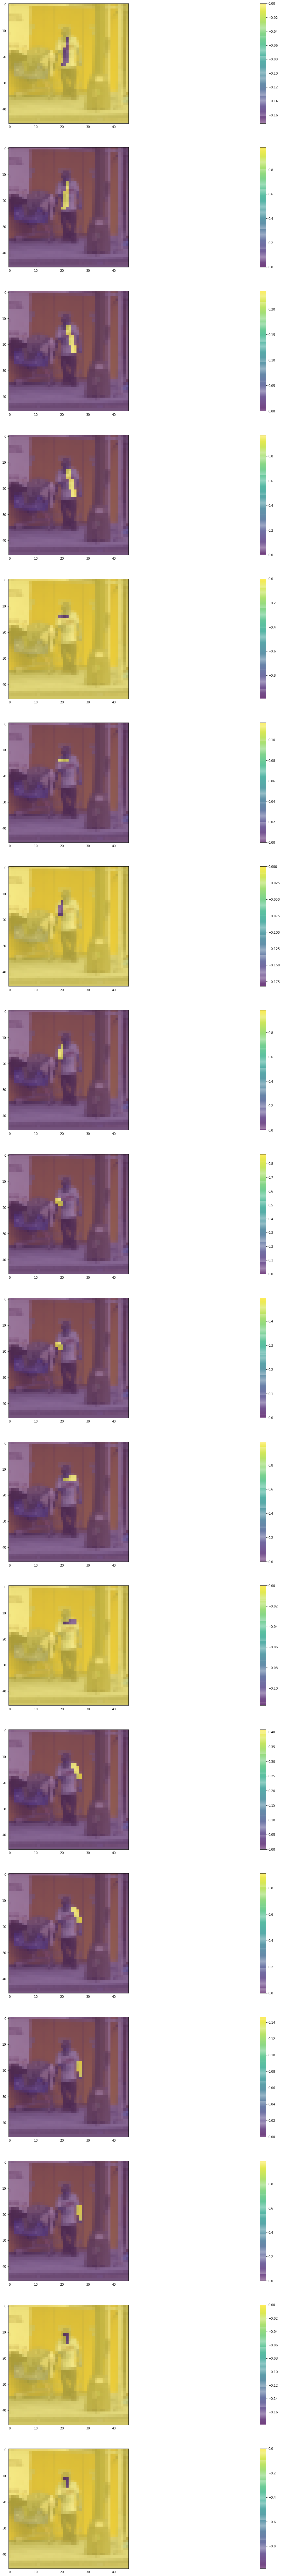

i--------------------- 0
array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.  

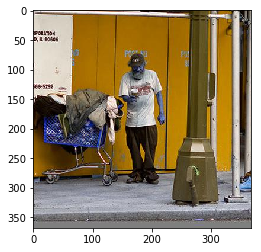

paf test


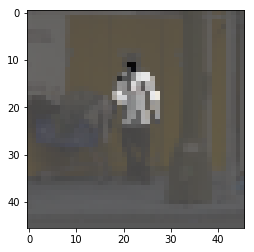

paf


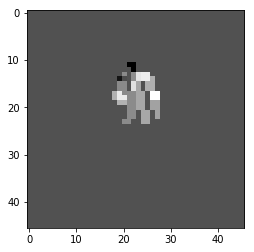

In [27]:
# show pafs

test_paf_file_path = test_image_file_path.replace("240x320", "paf30x40").replace(".jpg", ".npy")
print(test_paf_file_path)

gt_paf_file_path = test_paf_file_path

test_paf = np.load(test_paf_file_path)
print("test paf shape", test_paf.shape)  # (46, 46, 18)
gt_paf = np.load(gt_paf_file_path)

summed_test_paf = np.sum(test_paf, axis=2)
summed_gt_paf = np.sum(gt_paf, axis=2)

images = []  # a list containing alternated test_paf and gt_paf
titles = []  # titles for images above

# for i in range(test_paf.shape[2]):
#     #2  faster!
#     images.append(gt_paf[:,:,i])
#     images.append(test_paf[:,:,i])
#     images.append(rgb_image)

#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     titles.append('rgb image')
    
#     show_images(images, 1, titles)
#     images = []
#     titles = []
  

##############
fig, ax = plt.subplots(nrows=test_paf.shape[2], ncols=1)
print(ax.shape)
fig.set_size_inches((150, 150))

for i in range(test_paf.shape[2]):  
    #3 better
    ax[i].imshow(down_image, alpha=.70)
    ax_h = ax[i].imshow(test_paf[:,:,i], alpha=.50)
#     ax[i][j].set(xlabel=x_label, ylabel=y_label, title=joints[p])
    fig.colorbar(ax_h, ax=ax[i])

plt.show()
###############

    
for i in range(test_paf.shape[2]):
    print("i---------------------", i)
    pprint.pprint(test_paf[:,:,i])

    
print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

print("paf test")
plt.figure(4)
plt.imshow(summed_test_paf, cmap=plt.get_cmap('gray'))
plt.imshow(down_image, alpha=0.15)
plt.show()

print("paf")
plt.figure(7)
plt.imshow(summed_test_paf, cmap=plt.get_cmap('gray'))
plt.show()

paf_pairs_indices = [[1, 14], [0, 1], [12, 0], [13, 0], 
                    [4, 14], [5, 4], [6, 5], [7, 6], [15, 7], [16, 6],
                    [8, 14], [9, 8], [10, 9], [11, 10], [17, 11], [18, 10],
                    [14, 2], [2, 3]
                    ]
